## Sieć ograniczenia

### Eksperymenty
1. Sprawdzenie wydajności i wyników algorytmu którego generator i funkcja krzyżowania może generować dane faworyzujące agregację albo dezagregację w każdym układzie.
2. Na przykład jak radzi sobie algorytm z generatorem agregacyjnym i krzyżowaniem dezagregacyjnym w porównaniu z algorytmem z generatorem i krzyżowaniem agregacyjnym
3. Eksperymenty związane z wykorzystywaniem rozbudowy. Na przykład wprowadzenie kary lub nagrody w funkcji kosztów za rozbudowywanie struktur ponad bazową wersję
4. Porównanie algorytmu priorytetyzującego najkrótsze połączenia i algorytmu który na to nie uważa
5. Porównanie algorytmu genetycznego i ewolucyjnego różniczkowego

In [1]:
from matplotlib import pyplot as plt
import numpy as np

from main import run_genetic_algorithm, test_genetic_algorithm
from data_reader import parse_sndlib_file


with open("data.txt", "r") as file:
    file_content = file.read()
data = parse_sndlib_file(file_content)

### Algorytm genetyczny:

Poniżej przedstawiono wyniki uruchomienia algorytmu genetycznego dla 20 generacji.\
Algorytm dla domyślnych parametrów znajduje minimum lokalne (8250) około 18 generacji.

In [2]:
result = run_genetic_algorithm(data, cross_aggregating=True, mutation_aggregation_chance=1)
print(f"Result: {result}")

Result: [17020625, 17020625, 17020625, 17020625, 16020625, 16020625, 16020625, 16020625, 16020625, 16020625, 16020625, 15020625, 15020625, 15020625, 15020625, 16020625, 15020625, 14020625, 15020625, 16019710, 15020625, 14020625, 15020625, 15020625, 15019710, 14020625, 15019710, 14019710, 15019710, 15020625, 15020625, 15020625, 15020625, 15020625, 15020625, 15019710, 14020625, 14020625, 15020625, 13020625, 15020625, 14020625, 13020625, 13020625, 14019710, 13020625, 13020625, 13020625, 13020625, 13019710]


Następnie przeprowadzono eksperymenty z różnymi parametrami algorytmu genetycznego.\
Algorytm został wywołany 10 razy dla każdej kombinacji parametrów.

In [3]:
mean_results, std_results = test_genetic_algorithm(data)

In [2]:
population_sizes = [50, 100, 200]
severities = [0.01, 0.05, 0.1, 0.5]
mutation_chances = [0.1, 0.2, 0.3, 0.4, 0.5]
tournament_sizes = [2, 5, 10]
surviors = [5, 10, 20]

In [3]:
pop_results = [test_genetic_algorithm(data, population_size=population_size, normal_mutation_chance=0.3) for population_size in population_sizes]
pop_mean, pop_std = map(list, zip(*pop_results))

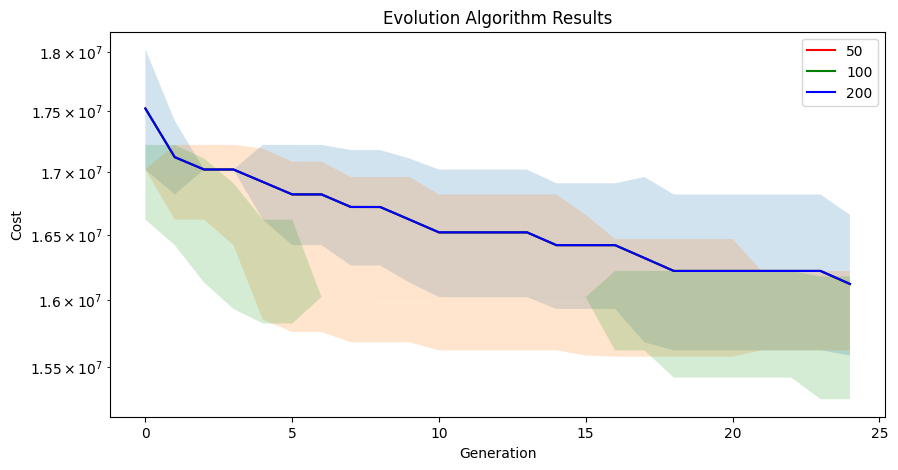

In [5]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(pop_mean[0], label=population_sizes[0], color='red')
plt.fill_between(range(25), pop_mean[0] - pop_std[0], pop_mean[0] + pop_std[0], alpha=0.2)
plt.plot(pop_mean[0], label=population_sizes[1], color='green')
plt.fill_between(range(25), pop_mean[1] - pop_std[1], pop_mean[1] + pop_std[1], alpha=0.2)
plt.plot(pop_mean[0], label=population_sizes[2], color='blue')
plt.fill_between(range(25), pop_mean[2] - pop_std[2], pop_mean[2] + pop_std[2], alpha=0.2)
plt.xlabel('Generation')
plt.ylabel('Cost')
plt.yscale('log')
plt.title('Evolution Algorithm Results')
plt.legend()
plt.show()

In [6]:
sev_results = [test_evolution_algorithm(data, severity=severity) for severity in severities]
sev_mean, sev_std = map(list, zip(*sev_results))

In [ ]:
mut_results = [test_evolution_algorithm(data, mutation_chance=mutation_chance) for mutation_chance in mutation_chances]
mut_mean, mut_std = map(list, zip(*mut_results))

In [ ]:
tournament_results = [test_evolution_algorithm(data, tournament_size=tournament_size) for tournament_size in tournament_sizes]
tournament_mean, tournament_std = map(list, zip(*tournament_results))

In [ ]:
surviors_results = [test_evolution_algorithm(data, survivors=survivors) for survivors in surviors]
survivors_mean, survivors_std = map(list, zip(*surviors_results))

Poniżej znajduje się wykres przedstawiający wyniki eksperymentów.\
Widoczne są różnice w wynikach dla różnych wartości parametrów algorytmu genetycznego.

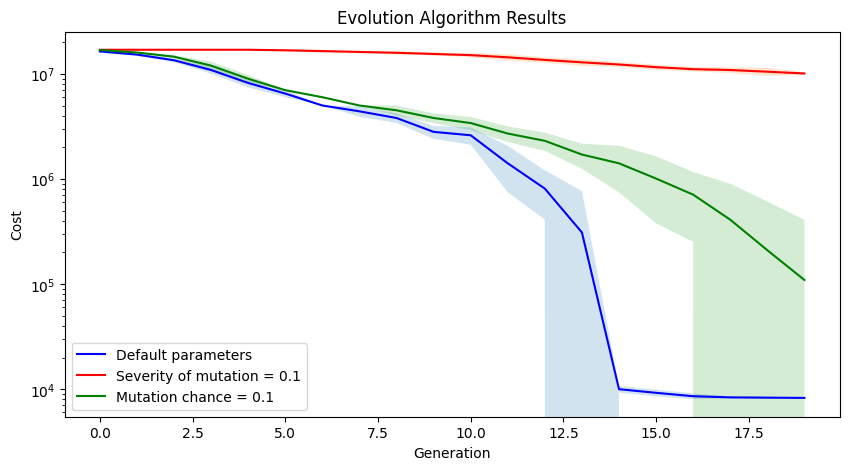

In [7]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(mean_results, label='Default parameters', color='blue')
plt.fill_between(range(20), mean_results - std_results, mean_results + std_results, alpha=0.2)
plt.plot(severity_mean_results, label='Severity of mutation = 0.1', color='red')
plt.fill_between(range(20), severity_mean_results - severity_std_results, severity_mean_results + severity_std_results, alpha=0.2)
plt.plot(chance_mean_results, label='Mutation chance = 0.1', color='green')
plt.fill_between(range(20), chance_mean_results - chance_std_results, chance_mean_results + chance_std_results, alpha=0.2)
plt.xlabel('Generation')
plt.ylabel('Cost')
plt.yscale('log')
plt.title('Evolution Algorithm Results')
plt.legend()
plt.show()